# Imports

In [99]:
import os
import datetime
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

import matplotlib.pyplot as plt

%matplotlib inline
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Constants

In [100]:
LOG_DIR = "/tensorboard_cifar_logs"

LABEL_NAMES = ["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_HEIGHT * IMAGE_WIDTH
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
VALIDATION_SZIZE = 5000

# Data

### Defining

In [101]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [102]:
type(cifar10)

module

### Reviev

In [103]:
y_train_all.shape

(50000, 1)

In [104]:
y_train_all[7][0]

7

In [105]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

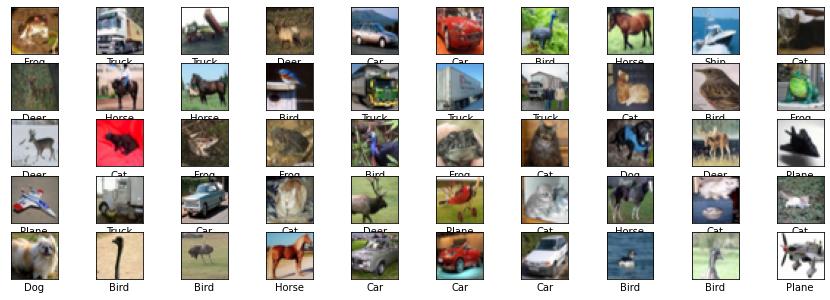

In [106]:
plt.figure(figsize=(15,5))

for index in range(50):
    plt.subplot(5, 10, index+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[index][0]])
    plt.imshow(x_train_all[index])

# Preprocessing Data

In [107]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [108]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [109]:
x_train_all.shape

(50000, 3072)

In [110]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
x_test.shape

(10000, 3072)

### Validation Dataset

In [111]:
x_val = x_train_all[:VALIDATION_SZIZE]
y_val = y_train_all[:VALIDATION_SZIZE]

In [112]:
x_train = x_train_all[VALIDATION_SZIZE:]
y_train = y_train_all[VALIDATION_SZIZE:]

# Defining models

In [113]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation="relu", name="m1_hidden1"),
    Dense(units=64, activation="relu", name="m1_hidden2"),
    Dense(16, activation="relu", name="m1_hidden3"),
    Dense(10, activation="softmax", name="m1_output")
])

model_1.compile(optimizer="adam",
                loss='sparse_categorical_crossentropy',
                metrics=["accuracy"])

In [114]:
model_2 = Sequential()
model_2.add(Dropout(0.2, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation="relu", name="m2_hidden1"))
model_2.add(Dense(64, activation="relu", name="m2_hidden2"))
model_2.add(Dense(16, activation="relu", name="m2_hidden3"))
model_2.add(Dense(10, activation="softmax", name="m2_output"))

model_2.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [115]:
model_3 = Sequential()
model_3.add(Dropout(0.2, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation="relu", name="m3_hidden1"))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation="relu", name="m3_hidden2"))
model_3.add(Dense(16, activation="relu", name="m3_hidden3"))
model_3.add(Dense(10, activation="softmax", name="m3_output"))

model_3.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [116]:
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [117]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_10 (Dropout)         (None, 3072)              0         
_________________________________________________________________
m2_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m2_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m2_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m2_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [118]:
model_3.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_11 (Dropout)         (None, 3072)              0         
_________________________________________________________________
m3_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
m3_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m3_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m3_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_______________________________________________

# Tensorboard Setup

In [119]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fitting the model

In [120]:
%%time
nr_epochs = 1
model_1.fit(x_train, y_train, batch_size=10, epochs=nr_epochs,
            callbacks=[tensorboard_callback], verbose=1, validation_data=(x_val, y_val))

4500/4500 [==============================] - 4s 839us/step - loss: 2.3032 - accuracy: 0.0996 - val_loss: 2.3025 - val_accuracy: 0.1010
Wall time: 4.24 s


In [121]:
%%time
nr_epochs = 1
model_2.fit(x_train, y_train, batch_size=10, epochs=nr_epochs,
            callbacks=[tensorboard_callback], verbose=1, validation_data=(x_val, y_val))

4500/4500 [==============================] - 4s 983us/step - loss: 2.0568 - accuracy: 0.2220 - val_loss: 1.9263 - val_accuracy: 0.2750
Wall time: 5.12 s


In [122]:
%%time
nr_epochs = 1
model_3.fit(x_train, y_train, batch_size=10, epochs=nr_epochs,
            callbacks=[tensorboard_callback], verbose=1, validation_data=(x_val, y_val))

4500/4500 [==============================] - 5s 1ms/step - loss: 2.3044 - accuracy: 0.0977 - val_loss: 2.3024 - val_accuracy: 0.1040
Wall time: 5.18 s


# Predictions on Individual Images

In [123]:
x_val[0].shape

(3072,)

In [124]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [125]:
np.set_printoptions(precision=3)

In [126]:
model_2.predict(test)

array([[0.039, 0.045, 0.136, 0.1  , 0.16 , 0.086, 0.219, 0.154, 0.014,
        0.048]], dtype=float32)

In [127]:
model_2.predict_classes(test)

array([6], dtype=int64)

In [128]:
y_val[0]

array([6], dtype=uint8)

In [129]:
for num in range(10):
    img = np.expand_dims(x_val[num], axis=0)
    predict = model_2.predict_classes(img)
    real = y_val[num]
    print(f"Image {num+1}.\t Predicted: {predict}\t real: {real}")
    


Image 1.	 Predicted: [6]	 real: [6]
Image 2.	 Predicted: [9]	 real: [9]
Image 3.	 Predicted: [9]	 real: [9]
Image 4.	 Predicted: [6]	 real: [4]
Image 5.	 Predicted: [9]	 real: [1]
Image 6.	 Predicted: [9]	 real: [1]
Image 7.	 Predicted: [6]	 real: [2]
Image 8.	 Predicted: [4]	 real: [7]
Image 9.	 Predicted: [0]	 real: [8]
Image 10.	 Predicted: [9]	 real: [3]
